In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime, date
from scipy.stats import spearmanr

# adding this line will make plots show up in the notebook
%matplotlib inline

In [2]:
obs = pd.read_csv('3hourthresh5.csv', header = 0, names=['Date', 'Maximum', 'Observations'])
temp = pd.read_csv('Temperature_Data.csv', header = 0, names=['Dates', 'Max', 'Min', 'Avg'])

In [43]:
peak = obs['Observations']
dates = obs['Date']
obs['year'] = pd.DatetimeIndex(obs['Date']).year
obs['month'] = pd.DatetimeIndex(obs['Date']).month
obs['day'] = pd.DatetimeIndex(obs['Date']).day
obs['hour'] = pd.DatetimeIndex(obs['Date']).hour

In [44]:
hour3check =obs.Maximum.groupby(obs['month']).mean()

print(hour3check)

month
4    0.289997
5    0.407714
6    0.586695
7    0.707878
8    0.687917
9    0.477535
Name: Maximum, dtype: float64


In [45]:
# dctday.clear()
# dctmax.clear()
x = ['00','01','02','03','04','05', '06','07','08', '09','10','11', '12', 13, 14, 15, 16, 17, 18 ,19]
dctday = {}
dctmax = {}
for i in x:
    dctday['list%sday' % i] = []
    dctmax['list%smax' % i] = []
dctday

{'list00day': [],
 'list01day': [],
 'list02day': [],
 'list03day': [],
 'list04day': [],
 'list05day': [],
 'list06day': [],
 'list07day': [],
 'list08day': [],
 'list09day': [],
 'list10day': [],
 'list11day': [],
 'list12day': [],
 'list13day': [],
 'list14day': [],
 'list15day': [],
 'list16day': [],
 'list17day': [],
 'list18day': [],
 'list19day': []}

In [46]:
newyear = 2000
for k in dctday:
    for i in range(len(obs)):
        if (obs.year[i] == newyear):
            dctday[k].append(datetime.strptime(str(obs.day[i]) + '/' + str(obs.month[i]) + ' ' + str(obs.hour[i]) , '%d/%m %H'))
    newyear = newyear + 1

In [7]:
newyear = 2000
for k in dctmax:
    for i in range(len(obs)):
        if (obs.year[i] == newyear):
            dctmax[k].append(obs.Maximum[i])
    newyear = newyear + 1

In [8]:
len(dctmax['list00max'])
#len(dctday['list00day'])

1448

C:\Users\python\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


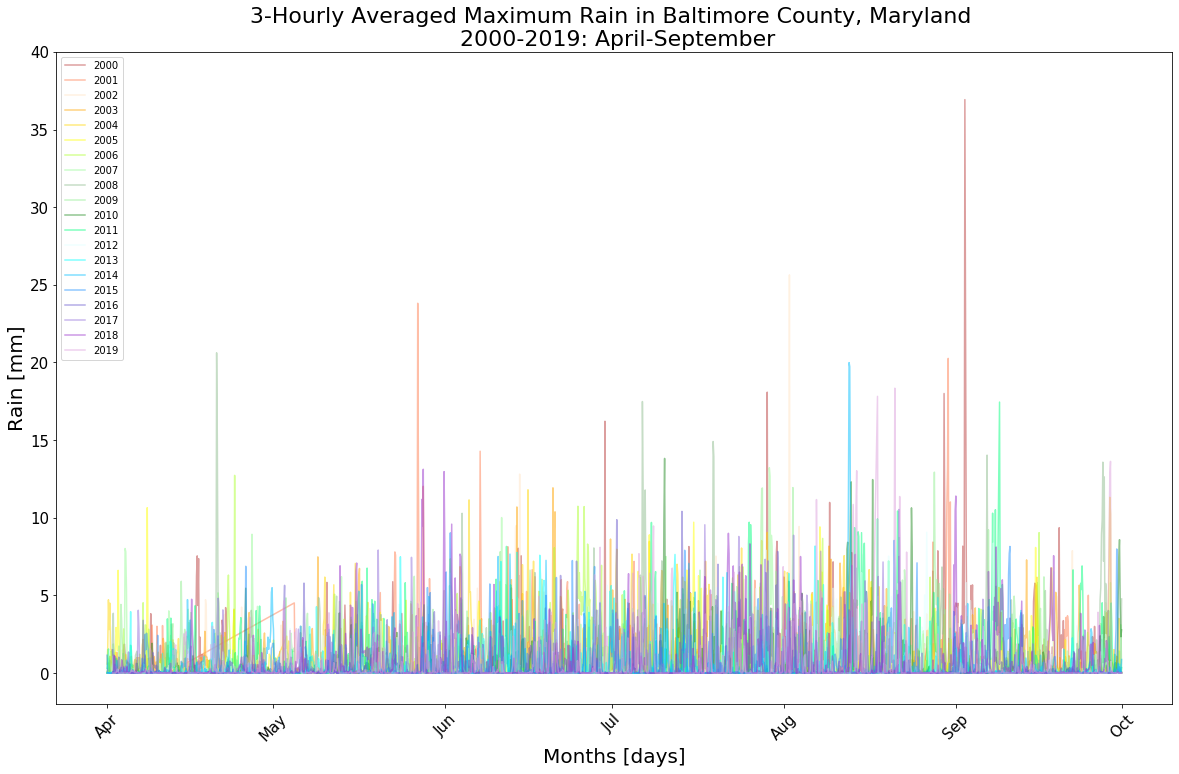

In [9]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(dctday['list00day'], dctmax['list00max'], c = '#bb3f3f', alpha=0.5, label='2000')
ax.plot(dctday['list01day'], dctmax['list01max'], c = 'coral', alpha=0.5, label='2001')
ax.plot(dctday['list02day'], dctmax['list02max'], c = 'bisque', alpha=0.5, label='2002')
ax.plot(dctday['list03day'], dctmax['list03max'], c = 'orange', alpha=0.5, label='2003')
ax.plot(dctday['list04day'], dctmax['list04max'], c = 'gold', alpha=0.5, label='2004')
ax.plot(dctday['list05day'], dctmax['list05max'], c = 'yellow', alpha=0.5, label='2005')
ax.plot(dctday['list06day'], dctmax['list06max'], c = 'greenyellow', alpha=0.5, label='2006')
ax.plot(dctday['list07day'], dctmax['list07max'], c = 'palegreen', alpha=0.5, label='2007')
ax.plot(dctday['list08day'], dctmax['list08max'], c = 'darkseagreen', alpha=0.5, label='2008')
ax.plot(dctday['list09day'], dctmax['list09max'], c = 'lightgreen', alpha=0.5, label='2009')
ax.plot(dctday['list10day'], dctmax['list10max'], c = 'forestgreen', alpha=0.5, label='2010')
ax.plot(dctday['list11day'], dctmax['list11max'], c = 'springgreen', alpha=0.5, label='2011')
ax.plot(dctday['list12day'], dctmax['list12max'], c = 'lightcyan', alpha=0.5, label='2012')
ax.plot(dctday['list13day'], dctmax['list13max'], c = 'aqua', alpha=0.5, label='2013')
ax.plot(dctday['list14day'], dctmax['list14max'], c = 'deepskyblue', alpha=0.5, label='2014')
ax.plot(dctday['list15day'], dctmax['list15max'], c = 'dodgerblue', alpha=0.5, label='2015')
ax.plot(dctday['list16day'], dctmax['list16max'], c = 'slateblue', alpha=0.5, label='2016')
ax.plot(dctday['list17day'], dctmax['list17max'], c = 'mediumpurple', alpha=0.5, label='2017')
ax.plot(dctday['list18day'], dctmax['list18max'], c = 'darkorchid', alpha=0.5, label='2018')
ax.plot(dctday['list19day'], dctmax['list19max'], c = 'plum', alpha=0.5, label='2019')
plt.legend(loc = 'upper left')
plt.yticks(size = 15)

plt.xticks(rotation =45, size = 15)
#ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
ax.xaxis.set_major_formatter(DateFormatter("%b"))
#ax.set_xlim([date(1900, 4, 1), date(1900, 4,30)])
ax.set_ylim([-2, 40])
ax.set_title("3-Hourly Averaged Maximum Rain in Baltimore County, Maryland \n 2000-2019: April-September" , fontsize = 22)
ax.set_xlabel('Months [days]', fontsize=20)
ax.set_ylabel("Rain [mm]", fontsize=20)
plt.show()
#plt.savefig('1hour6max.png')

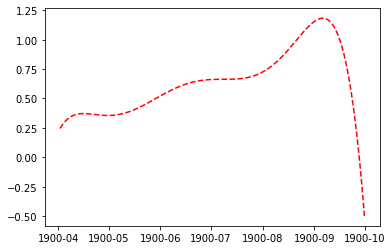

In [10]:
peak = []
check = []
for k in dctmax:
    z = np.polyfit(range(len(dctmax[k])), dctmax[k], 6)
    p = np.poly1d(z)
    check.append(p)
plt.plot(dctday['list19day'],check[0](range(len(dctmax['list19max']))),"r--")

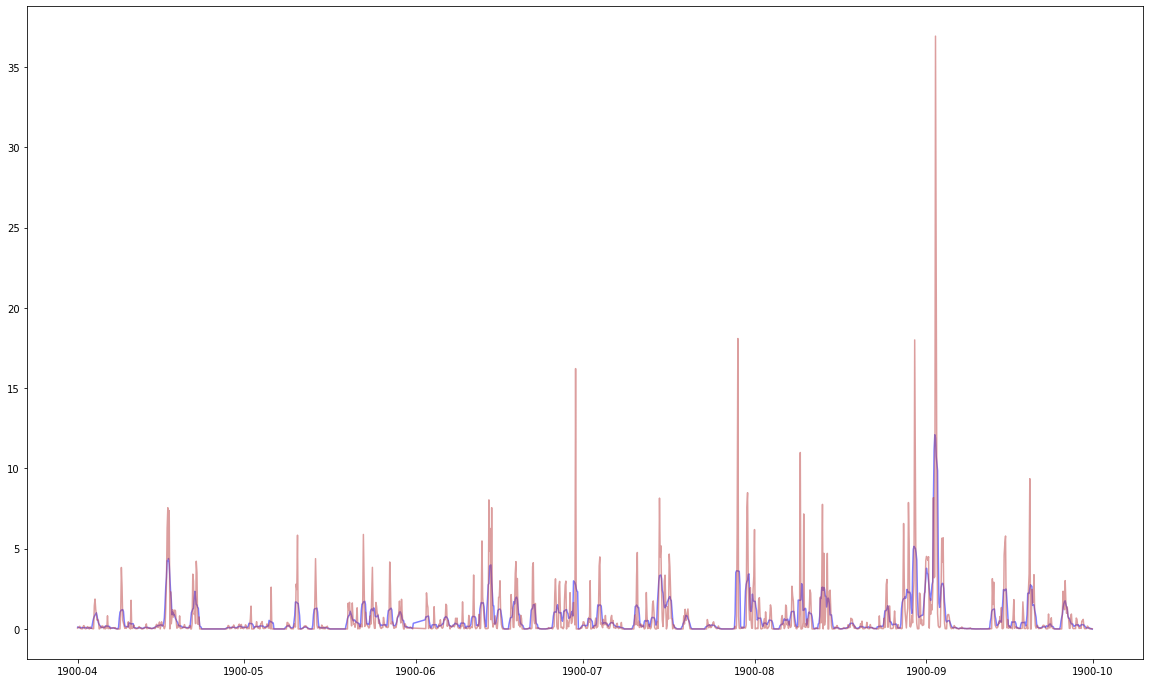

In [11]:
from scipy.signal import savgol_filter
yhat = savgol_filter(dctmax['list00max'], 7, 1)
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(dctday['list00day'], yhat, c = 'blue', alpha=0.5, label='2000')
ax.plot(dctday['list00day'],dctmax['list00max'], c = '#bb3f3f', alpha=0.5, label='2000')


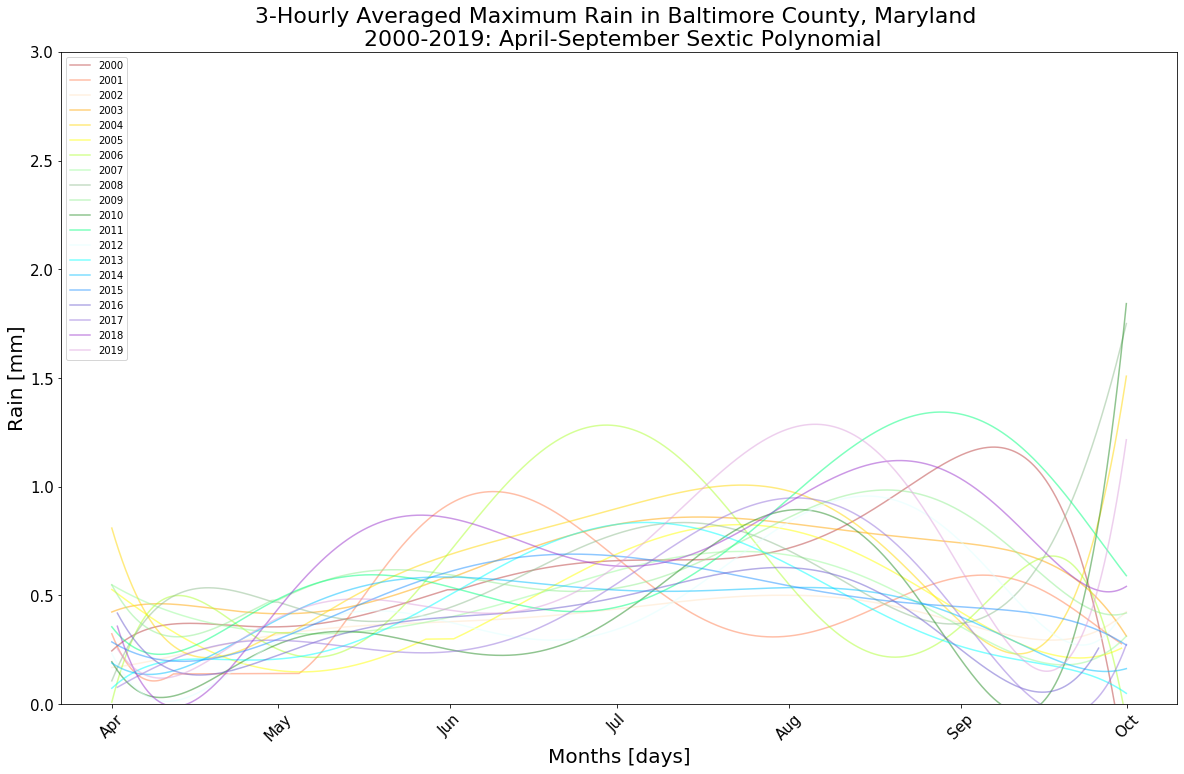

In [12]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(dctday['list00day'], check[0](range(len(dctmax['list00max']))), c = '#bb3f3f', alpha=0.5, label='2000')
ax.plot(dctday['list01day'], check[1](range(len(dctmax['list01max']))), c = 'coral', alpha=0.5, label='2001')
ax.plot(dctday['list02day'], check[2](range(len(dctmax['list02max']))), c = 'bisque', alpha=0.5, label='2002')
ax.plot(dctday['list03day'], check[3](range(len(dctmax['list03max']))), c = 'orange', alpha=0.5, label='2003')
ax.plot(dctday['list04day'], check[4](range(len(dctmax['list04max']))), c = 'gold', alpha=0.5, label='2004')
ax.plot(dctday['list05day'], check[5](range(len(dctmax['list05max']))), c = 'yellow', alpha=0.5, label='2005')
ax.plot(dctday['list06day'], check[6](range(len(dctmax['list06max']))), c = 'greenyellow', alpha=0.5, label='2006')
ax.plot(dctday['list07day'], check[7](range(len(dctmax['list07max']))), c = 'palegreen', alpha=0.5, label='2007')
ax.plot(dctday['list08day'], check[8](range(len(dctmax['list08max']))), c = 'darkseagreen', alpha=0.5, label='2008')
ax.plot(dctday['list09day'], check[9](range(len(dctmax['list09max']))), c = 'lightgreen', alpha=0.5, label='2009')
ax.plot(dctday['list10day'], check[10](range(len(dctmax['list10max']))), c = 'forestgreen', alpha=0.5, label='2010')
ax.plot(dctday['list11day'], check[11](range(len(dctmax['list11max']))), c = 'springgreen', alpha=0.5, label='2011')
ax.plot(dctday['list12day'], check[12](range(len(dctmax['list12max']))), c = 'lightcyan', alpha=0.5, label='2012')
ax.plot(dctday['list13day'], check[13](range(len(dctmax['list13max']))), c = 'aqua', alpha=0.5, label='2013')
ax.plot(dctday['list14day'], check[14](range(len(dctmax['list14max']))), c = 'deepskyblue', alpha=0.5, label='2014')
ax.plot(dctday['list15day'], check[15](range(len(dctmax['list15max']))), c = 'dodgerblue', alpha=0.5, label='2015')
ax.plot(dctday['list16day'], check[16](range(len(dctmax['list16max']))), c = 'slateblue', alpha=0.5, label='2016')
ax.plot(dctday['list17day'], check[17](range(len(dctmax['list17max']))), c = 'mediumpurple', alpha=0.5, label='2017')
ax.plot(dctday['list18day'], check[18](range(len(dctmax['list18max']))), c = 'darkorchid', alpha=0.5, label='2018')
ax.plot(dctday['list19day'], check[19](range(len(dctmax['list19max']))), c = 'plum', alpha=0.5, label='2019')
plt.legend(loc = 'upper left')
plt.yticks(size = 15)
plt.legend(loc = 'upper left')
plt.yticks(size = 15)
plt.ylim([0,3])
plt.xticks(rotation =45, size = 15)
#ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
ax.xaxis.set_major_formatter(DateFormatter("%b"))
#ax.set_xlim([date(1900, 4, 1), date(1900, 4,30)])
#ax.set_ylim([-2, 55])
ax.set_title("3-Hourly Averaged Maximum Rain in Baltimore County, Maryland \n 2000-2019: April-September Sextic Polynomial" , fontsize = 22)
ax.set_xlabel('Months [days]', fontsize=20)
ax.set_ylabel("Rain [mm]", fontsize=20)
plt.show()

In [15]:
# z = np.polyfit(range(len(peak)), peak, 1)
# p = np.poly1d(z)
# fig, ax = plt.subplots(figsize=(20, 12))
# ax.plot(dates, peak, c = 'purple')
# plt.plot(dates,p(range(len(peak))),"r--")
# #plt.plot(newtime,p2(range(len(checker))),"b-")
# plt.xticks(rotation =45, size = 15)
# plt.yticks(size = 15)
# ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
# ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
# ax.set_title("Rain in Baltimore County, Maryland from 2000-2019 \n above " + str(thresh) + " mm" , fontsize = 22)
# ax.set_xlabel('Dates', fontsize=20)
# ax.set_ylabel("Rain [mm]", fontsize=20)
# plt.show()
# #plt.savefig('path/name')

In [60]:
## Threshold Analysis Working Notebook for Temperature
## Was not used in Final Thesis paper, was explored throughout the process

temp['Datetime'] = pd.to_datetime(temp['Dates'], format="%m/%d/%Y")
obs['Datetime'] = pd.to_datetime(obs['Date']) #, format="%m-%d-%Y %H:%M:%S")
#i=temp[temp['Datetime'] == datetime.date(obs.Datetime[6000])]

KeyError: 'Dates'

In [17]:
# checkz = []
# for x in range(len(obs)):
#     i=temp[temp['Datetime'] == datetime.date(obs.Datetime[x])]
    
#     #print(checkz[x])
# #     for i in range(len(temp)):
# #             if(temp.Avg[i] != 'M'):
# #                 if (datetime.date(temp.Datetime[i]) == datetime.date(obs.Datetime[x])):
# #                     checkz.insert(x, temp.Avg[i])

In [18]:
temp = temp.replace('M',np.NaN)
for i in range(len(obs)):
    obs.Datetime[i] = obs.Datetime[i].replace(hour = 0, minute=0, second=0)
# mergedStuff = pd.merge(obs, temp, on=['Datetime'], how='left')
# mergedStuff

C:\Users\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
mergedStuff = pd.merge(obs, temp, on=['Datetime'], how='left')
mergedStuff = mergedStuff.dropna()
mergedStuff

,Date,Maximum,Observations,year,month,day,hour,Datetime,Dates,Max,Min,Avg
5350,2003-08-27 00:00:00,0.015083,0,2003,8,27,0,2003-08-27,8/27/2003,85,67,76
5351,2003-08-27 03:00:00,0.008917,0,2003,8,27,3,2003-08-27,8/27/2003,85,67,76
5352,2003-08-27 06:00:00,0.006250,0,2003,8,27,6,2003-08-27,8/27/2003,85,67,76
5353,2003-08-27 09:00:00,0.091833,0,2003,8,27,9,2003-08-27,8/27/2003,85,67,76
5354,2003-08-27 12:00:00,0.064917,0,2003,8,27,12,2003-08-27,8/27/2003,85,67,76
...,...,...,...,...,...,...,...,...,...,...,...,...
28887,2019-09-30 09:00:00,0.000000,0,2019,9,30,9,2019-09-30,9/30/2019,72,68,70
28888,2019-09-30 12:00:00,0.000000,0,2019,9,30,12,2019-09-30,9/30/2019,72,68,70
28889,2019-09-30 15:00:00,0.000000,0,2019,9,30,15,2019-09-30,9/30/2019,72,68,70
28890,2019-09-30 18:00:00,0.000000,0,2019,9,30,18,2019-09-30,9/30/2019,72,68,70


In [20]:
mergedStuff = mergedStuff.reset_index()
mergedStuff

,index,Date,Maximum,Observations,year,month,day,hour,Datetime,Dates,Max,Min,Avg
0,5350,2003-08-27 00:00:00,0.015083,0,2003,8,27,0,2003-08-27,8/27/2003,85,67,76
1,5351,2003-08-27 03:00:00,0.008917,0,2003,8,27,3,2003-08-27,8/27/2003,85,67,76
2,5352,2003-08-27 06:00:00,0.006250,0,2003,8,27,6,2003-08-27,8/27/2003,85,67,76
3,5353,2003-08-27 09:00:00,0.091833,0,2003,8,27,9,2003-08-27,8/27/2003,85,67,76
4,5354,2003-08-27 12:00:00,0.064917,0,2003,8,27,12,2003-08-27,8/27/2003,85,67,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,28887,2019-09-30 09:00:00,0.000000,0,2019,9,30,9,2019-09-30,9/30/2019,72,68,70
18418,28888,2019-09-30 12:00:00,0.000000,0,2019,9,30,12,2019-09-30,9/30/2019,72,68,70
18419,28889,2019-09-30 15:00:00,0.000000,0,2019,9,30,15,2019-09-30,9/30/2019,72,68,70
18420,28890,2019-09-30 18:00:00,0.000000,0,2019,9,30,18,2019-09-30,9/30/2019,72,68,70


In [22]:
# ## temperature data check
# corr, _ = spearmanr(mergedStuff.Observations, mergedStuff.Min)
# checker = np.array(mergedStuff.Maximum)
# checker = FloatVector(checker[(checker)])
# # r.assign('peak', checker)
# # print(r("MannKendall(peak)"))
# corr

In [47]:
freq = obs['Observations']
peak = obs['Maximum']
dates = obs['Date']
temp = mergedStuff['Avg']
dated = mergedStuff['Date']

In [48]:
# fig, ax = plt.subplots(figsize=(20, 12))
# ax.scatter(newtime, checker, c = 'purple')
# plt.plot(newtime,p(range(len(checker))),"r--")
# #plt.plot(newtime,p2(range(len(checker))),"b-")
# plt.xticks(rotation =45, size = 15)
# plt.yticks(size = 15)
# ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
# ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
# ax.set_title("Rain in Baltimore County, Maryland from 2000-2019 \n above " + str(thresh) + " mm" , fontsize = 22)
# ax.set_xlabel('Dates', fontsize=20)
# ax.set_ylabel("Rain [mm]", fontsize=20)
# plt.show()
# #plt.savefig('path/name')

In [49]:
monthes = []
threshes = []
taus = []
ps = []
spear = []

In [50]:
z = np.polyfit(range(len(peak)), peak, 1)
p = np.poly1d(z)

In [57]:
thresh = 5
for k in range(4,10):
    checker = []
    newtime = []
    thismonth = k
    name = '-0' + str(thismonth) + '-'
    for i in range(len(freq)):
        if name in dates[i]:
            checker.append(freq[i])
            newtime.append(datetime.strptime(dates[i], '%Y-%m-%d %H:%M:%S'))
    corr, _ = spearmanr(newtime, checker)
    checker = np.array(checker)
    checker = FloatVector(checker[~np.isnan(checker)])
    r.assign('peak', checker)
#     try:
# #         tau, p, _, _, _ = r("MannKendall(peak)")
# #         tau = list(tau)
# #         p = list(p)
#     except:
# #         tau[0] = 0
# #         p[0] = 0
    monthes.append(thismonth)
    threshes.append(thresh)
#     taus.append(tau[0])
#     ps.append(p[0])
    spear.append(corr)

# z = np.polyfit(range(len(checker)), checker, 1)
# p = np.poly1d(z)
# z2 = np.polyfit(range(len(checker)), checker, 20)
# p2 = np.poly1d(z2)

In [58]:
df = pd.DataFrame(data = [monthes, threshes, taus, ps, spear])
data = df.transpose()
data.columns = ['Months', 'Thresholds', 'MK', 'Significance', 'SR']
#data.to_csv('Obs3hour.csv')

In [59]:
print(r("MannKendall(peak)"))

RRuntimeError: Error in MannKendall(peak) : could not find function "MannKendall"


In [255]:
tau, p, _, _, _ = r("MannKendall(peak)")


TypeError: 'FloatVector' object is not callable

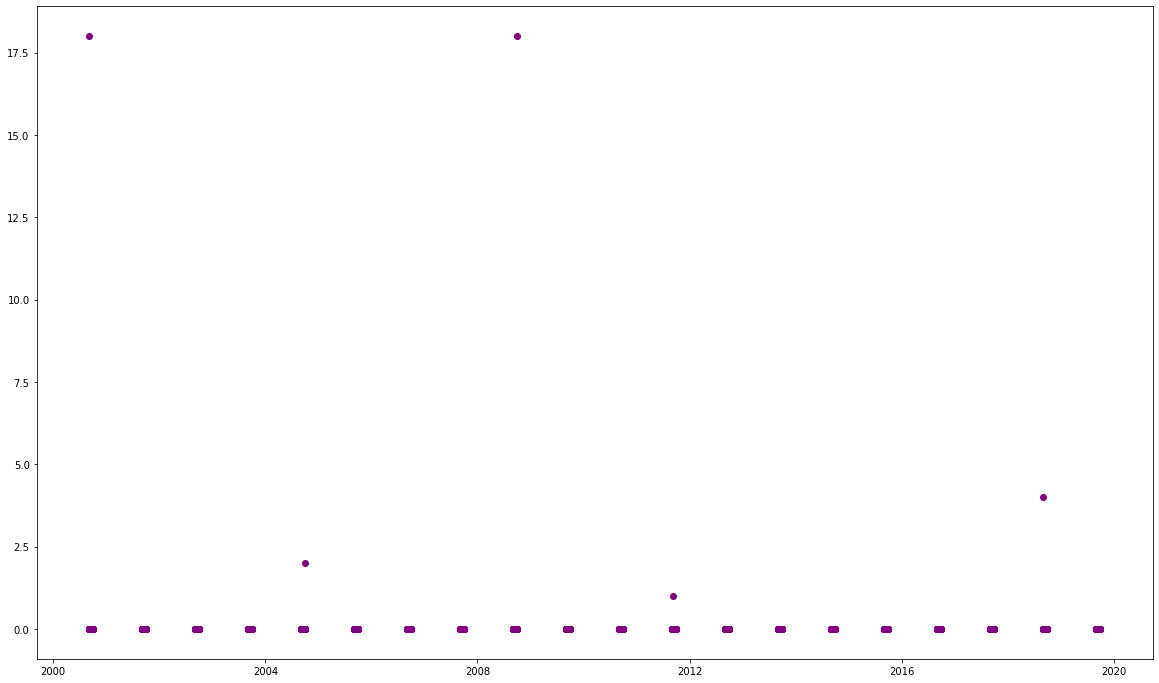

In [258]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(newtime, checker, c = 'purple')
plt.plot(newtime,p(range(len(checker))),"r--")
#plt.plot(newtime,p2(range(len(checker))),"b-")
plt.xticks(rotation =45, size = 15)
plt.yticks(size = 15)
ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
ax.set_title("Rain in Baltimore County, Maryland from 2000-2019 \n above " + str(thresh) + " mm" , fontsize = 22)
ax.set_xlabel('Dates', fontsize=20)
ax.set_ylabel("Rain [mm]", fontsize=20)
plt.show()
#plt.savefig('path/name')

In [ ]:
checker = np.array(checker)
checker = FloatVector(checker[~np.isnan(checker)])
r.assign('peak', checker)

In [247]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

utils = importr('utils')
utils.chooseCRANmirror(ind=1) # select a CRAN mirror

rpy2.rinterface.NULL

In [248]:
utils.install_packages('Kendall')

rpy2.rinterface.NULL

In [249]:
importr('Kendall')

rpy2.robjects.packages.Package as a <module 'Kendall'>

In [250]:
print(r("MannKendall(peak)"))

tau = -0.00433, 2-sided pvalue =0.53323



In [570]:
monthes = []
threshes = []
taus = []
ps = []
spear = []

In [581]:
thresh = 50
for k in range(4,10):
    checker = []
    newtime = []
    thismonth = k
    name = '-0' + str(thismonth) + '-'
    for i in range(len(peak)):
        if peak[i] > thresh and name in dates[i]:
            checker.append(peak[i])
            newtime.append(datetime.strptime(dates[i], '%Y-%m-%d %H:%M:%S'))
    corr, _ = spearmanr(newtime, checker)
    checker = np.array(checker)
    checker = FloatVector(checker[~np.isnan(checker)])
    r.assign('peak', checker)
    try:
        tau, p, _, _, _ = r("MannKendall(peak)")
        tau = list(tau)
        p = list(p)
    except:
        tau[0] = 0
        p[0] = 0
    monthes.append(thismonth)
    threshes.append(thresh)
    taus.append(tau[0])
    ps.append(p[0])
    spear.append(corr)
            
            
# z = np.polyfit(range(len(checker)), checker, 1)
# p = np.poly1d(z)
# z2 = np.polyfit(range(len(checker)), checker, 20)
# p2 = np.poly1d(z2)

In [582]:
df = pd.DataFrame(data = [monthes, threshes, taus, ps, spear]) #, columns = ['Months', 'Thresholds', 'MK', 'Significance', 'SR'])

In [583]:
data = df.transpose()
data.columns = ['Months', 'Thresholds', 'MK', 'Significance', 'SR']

In [584]:
data.to_csv('MKTest3hour.csv')

In [431]:
checker = np.array(checker)
checker = FloatVector(checker[~np.isnan(checker)])
r.assign('peak', checker)

288.000000,1376.000000,1860.000000,2203.000000,...,0.000000,0.000000,0.000000,0.000000


In [495]:
tau, p, _ , _ , _ = r("MannKendall(peak)")
tau

-0.072197


In [496]:
tau = list(tau[0])
x = tau[0]

TypeError: 'float' object is not iterable

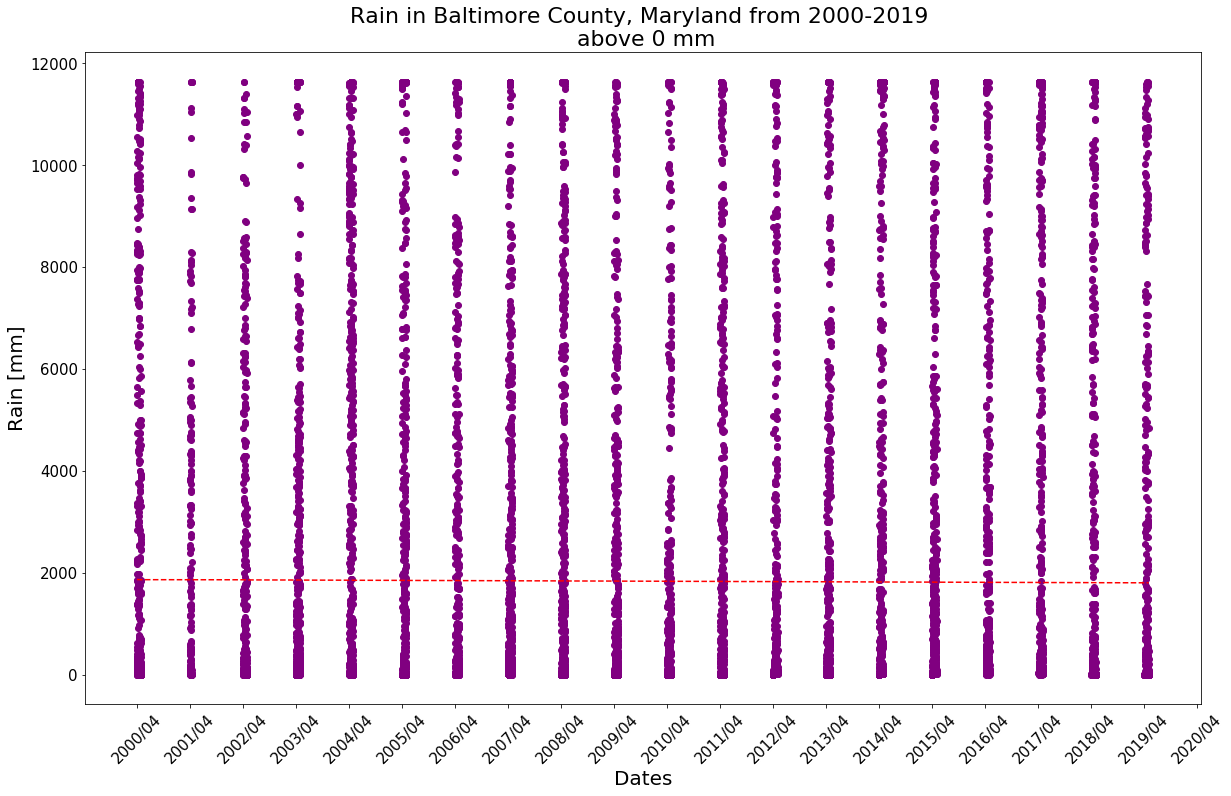

In [414]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(newtime, checker, c = 'purple')
plt.plot(newtime,p(range(len(checker))),"r--")
#plt.plot(newtime,p2(range(len(checker))),"b-")
plt.xticks(rotation =45, size = 15)
plt.yticks(size = 15)
ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
ax.set_title("Rain in Baltimore County, Maryland from 2000-2019 \n above " + str(thresh) + " mm" , fontsize = 22)
ax.set_xlabel('Dates', fontsize=20)
ax.set_ylabel("Rain [mm]", fontsize=20)
plt.show()
#plt.savefig('path/name')

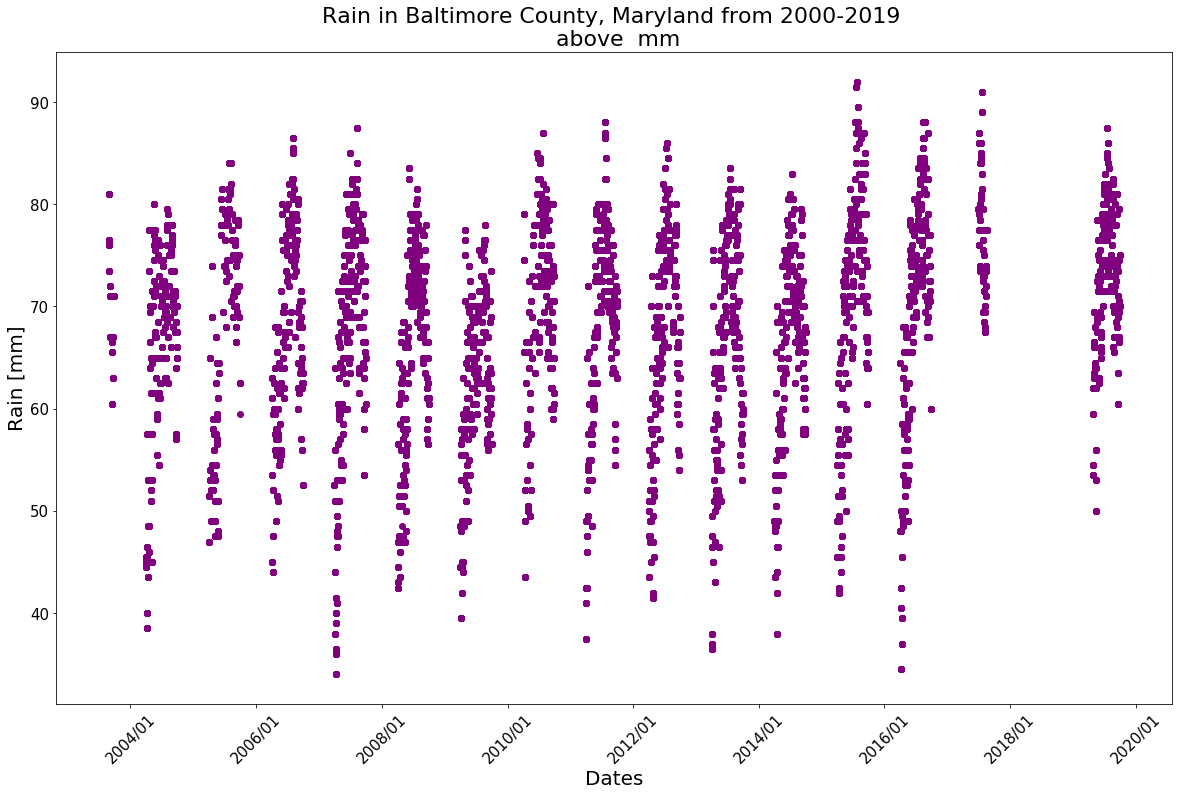

In [12]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(mergedStuff.Datetime, mergedStuff.Avg, c = 'purple')
#plt.plot(newtime,p(range(len(checker))),"r--")
#plt.plot(newtime,p2(range(len(checker))),"b-")
plt.xticks(rotation =45, size = 15)
plt.yticks(size = 15)
#ax.xaxis.set_major_locator(mdates.MonthLocator(thismonth))
ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
ax.set_title("Rain in Baltimore County, Maryland from 2000-2019 \n above  mm" , fontsize = 22)
ax.set_xlabel('Dates', fontsize=20)
ax.set_ylabel("Rain [mm]", fontsize=20)
plt.show()
#plt.savefig('path/name')